In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import os
import numpy as np
import cv2
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import random as rn
from sklearn.preprocessing import  StandardScaler


In [ ]:
!pip3 install tensorflow_addons
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Input ,BatchNormalization, Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Conv1D , MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,balanced_accuracy_score
import joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 41.3 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
path = 'drive/MyDrive/'

In [ ]:
SUB = pd.read_csv(path+'Sensor + Image/sensor.csv', skiprows = 1)
SUB.head()

,Time,X-axis Accelerometer (g),Y-axis Accelerometer (g),Z-axis Accelerometer (g),Roll Gyroscrope (deg/s),Pitch Gyroscope (deg/s),Yaw Gyroscope (deg/s),Luminosity (lux),X-axis Accelerometer (g).1,Y-axis Accelerometer (g).1,...,Yaw Gyroscope (deg/s).4,Luminosity (lux).4,Raw Brainwave Signal,Infrared 1,Infrared 2,Infrared 3,Infrared 4,Infrared 5,Infrared 6,Label
0,2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,-0.981,0.260,...,315.915,2108.154,45,1,1,1,1,1,1,7
1,2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,-0.981,0.260,...,344.146,2108.154,1,1,1,1,1,1,1,7
2,2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,-0.975,0.282,...,372.012,2108.154,325,1,1,1,1,1,1,7
3,2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,-0.973,0.301,...,356.463,2108.154,396,1,1,1,1,1,1,7
4,2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,-0.973,0.301,...,126.768,2108.154,-436,1,1,1,1,1,1,7


In [ ]:
SUB['Label'].unique()

array([ 7,  1, 11,  2,  3,  4,  5,  6,  8,  9, 10])

In [ ]:
print(SUB.shape)

(17932, 44)


# Data Processing

In [ ]:
SUB.isnull().sum()

Time                          0
X-axis Accelerometer (g)      0
Y-axis Accelerometer (g)      0
Z-axis Accelerometer (g)      0
Roll Gyroscrope (deg/s)       0
Pitch Gyroscope (deg/s)       0
Yaw Gyroscope (deg/s)         0
Luminosity (lux)              0
X-axis Accelerometer (g).1    0
Y-axis Accelerometer (g).1    0
Z-axis Accelerometer (g).1    0
Roll Gyroscrope (deg/s).1     0
Pitch Gyroscope (deg/s).1     0
Yaw Gyroscope (deg/s).1       0
Luminosity (lux).1            0
X-axis Accelerometer (g).2    0
Y-axis Accelerometer (g).2    0
Z-axis Accelerometer (g).2    0
Roll Gyroscrope (deg/s).2     0
Pitch Gyroscope (deg/s).2     0
Yaw Gyroscope (deg/s).2       0
Luminosity (lux).2            0
X-axis Accelerometer (g).3    0
Y-axis Accelerometer (g).3    0
Z-axis Accelerometer (g).3    0
Roll Gyroscrope (deg/s).3     0
Pitch Gyroscope (deg/s).3     0
Yaw Gyroscope (deg/s).3       0
Luminosity (lux).3            0
X-axis Accelerometer (g).4    0
Y-axis Accelerometer (g).4    0
Z-axis A

In [ ]:
NA_cols  = SUB.columns[SUB.isnull().any()]
print('Columns contain NULL values : \n', NA_cols )


SUB.dropna(inplace = True)
SUB.drop_duplicates(inplace = True)
print('Sensor Data shape after dropping NaN and redudant samples :',SUB.shape)


times = SUB['Time']

list_DROP = [ 'Infrared 1',
              'Infrared 2',
              'Infrared 3',
              'Infrared 4',
              'Infrared 5',
              'Infrared 6']
SUB.drop(list_DROP, axis = 1, inplace=  True )
SUB.drop( NA_cols, axis = 1, inplace=  True ) # drop NAN COLS

print('Sensor Data shape after dropping columns contain NaN values :',SUB.shape)

Columns contain NULL values : 
 Index([], dtype='object')
Sensor Data shape after dropping NaN and redudant samples : (17932, 44)
Sensor Data shape after dropping columns contain NaN values : (17932, 38)


In [ ]:
SUB.set_index('Time', inplace = True)
SUB.head()

,X-axis Accelerometer (g),Y-axis Accelerometer (g),Z-axis Accelerometer (g),Roll Gyroscrope (deg/s),Pitch Gyroscope (deg/s),Yaw Gyroscope (deg/s),Luminosity (lux),X-axis Accelerometer (g).1,Y-axis Accelerometer (g).1,Z-axis Accelerometer (g).1,...,Luminosity (lux).3,X-axis Accelerometer (g).4,Y-axis Accelerometer (g).4,Z-axis Accelerometer (g).4,Roll Gyroscrope (deg/s).4,Pitch Gyroscope (deg/s).4,Yaw Gyroscope (deg/s).4,Luminosity (lux).4,Raw Brainwave Signal,Label
Time,,,,,,,,,,,,,,,,,,,,,
2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,-0.981,0.260,0.098,...,1231.336,-1.240,-0.557,0.227,-75.854,44.024,315.915,2108.154,45,7
2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,-0.981,0.260,0.098,...,1231.336,-1.240,-0.557,0.227,-28.780,55.549,344.146,2108.154,1,7
2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,-0.975,0.282,0.091,...,1231.336,-1.884,-0.687,0.251,27.256,87.134,372.012,2108.154,325,7
2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,-0.973,0.301,0.103,...,1231.336,-1.884,-0.687,0.251,2.866,117.683,356.463,2108.154,396,7
2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,-0.973,0.301,0.103,...,1231.336,-1.597,-0.646,0.112,10.000,30.671,126.768,2108.154,-436,7


In [ ]:
"""
LABELS MODIFY
"""

SUB['Label'] = np.where(SUB['Label'] <= 5 , 0, SUB['Label'])#Fall
SUB['Label'] = np.where(SUB['Label'] >= 6 , 1, SUB['Label'])#Non-Fall
SUB['Label'].unique()

array([1, 0])

In [ ]:
SUB.head()

,X-axis Accelerometer (g),Y-axis Accelerometer (g),Z-axis Accelerometer (g),Roll Gyroscrope (deg/s),Pitch Gyroscope (deg/s),Yaw Gyroscope (deg/s),Luminosity (lux),X-axis Accelerometer (g).1,Y-axis Accelerometer (g).1,Z-axis Accelerometer (g).1,...,Luminosity (lux).3,X-axis Accelerometer (g).4,Y-axis Accelerometer (g).4,Z-axis Accelerometer (g).4,Roll Gyroscrope (deg/s).4,Pitch Gyroscope (deg/s).4,Yaw Gyroscope (deg/s).4,Luminosity (lux).4,Raw Brainwave Signal,Label
Time,,,,,,,,,,,,,,,,,,,,,
2018-07-04T12:04:17.738369,-1.005,0.229,-0.083,-0.671,0.488,-2.683,0.0,-0.981,0.260,0.098,...,1231.336,-1.240,-0.557,0.227,-75.854,44.024,315.915,2108.154,45,1
2018-07-04T12:04:17.790509,-1.005,0.228,-0.082,-3.415,-0.549,0.122,0.0,-0.981,0.260,0.098,...,1231.336,-1.240,-0.557,0.227,-28.780,55.549,344.146,2108.154,1,1
2018-07-04T12:04:17.836632,-1.005,0.231,-0.079,-2.622,-1.402,-0.549,0.0,-0.975,0.282,0.091,...,1231.336,-1.884,-0.687,0.251,27.256,87.134,372.012,2108.154,325,1
2018-07-04T12:04:17.885262,-1.005,0.231,-0.079,-2.561,-2.195,-1.220,0.0,-0.973,0.301,0.103,...,1231.336,-1.884,-0.687,0.251,2.866,117.683,356.463,2108.154,396,1
2018-07-04T12:04:17.945423,-1.008,0.229,-0.072,-3.537,-2.073,-0.305,0.0,-0.973,0.301,0.103,...,1231.336,-1.597,-0.646,0.112,10.000,30.671,126.768,2108.154,-436,1


In [ ]:
cam = '1'

image = path+'Sensor + Image' + '/' + 'image_' + cam +  '.npy'
name = path+'Sensor + Image' + '/' + 'name_' + cam +  '.npy'
label = path+'Sensor + Image' + '/' + 'label_' + cam +  '.npy'

img_1 = np.load(image)
label_1 = np.load(label)
name_1 = np.load(name)

cam = '2'

image = path+'Sensor + Image' + '/' + 'image_' + cam +  '.npy'
name = path+'Sensor + Image' + '/' + 'name_' + cam +  '.npy'
label = path+'Sensor + Image' + '/' + 'label_' + cam +  '.npy'

img_2 = np.load(image)
label_2 = np.load(label)
name_2 = np.load(name)



In [ ]:
print(len(img_1))
print(len(name_1))
print(len(img_2))
print(len(name_2))

17932
17932
17932
17932


In [ ]:
# remove NaN values corresponding to index sample in csv file
redundant_1 = list(set(name_1) - set(times))
redundant_2 = list(set(name_2) - set(times))
ind = np.arange(0,17932)


red_in1 = ind[np.isin(name_1,redundant_1)]
name_1 =  np.delete(name_1, red_in1)
img_1 = np.delete(img_1, red_in1, axis = 0 )
label_1 = np.delete(label_1, red_in1)

red_in2 = ind[np.isin(name_2,redundant_2)]
name_2 =  np.delete(name_2, red_in2)
img_2 = np.delete(img_2, red_in2, axis = 0 )
label_2 = np.delete(label_2, red_in2)

In [ ]:
label_1 = [0 if i <=5 else 1 for i in label_1]
print(label_1)

[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 

In [ ]:
label_2 = [0 if i <=5 else 1 for i in label_2]
print(label_2)

[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 

In [ ]:
print(len(name_2))
print(len(name_1))

17932
17932


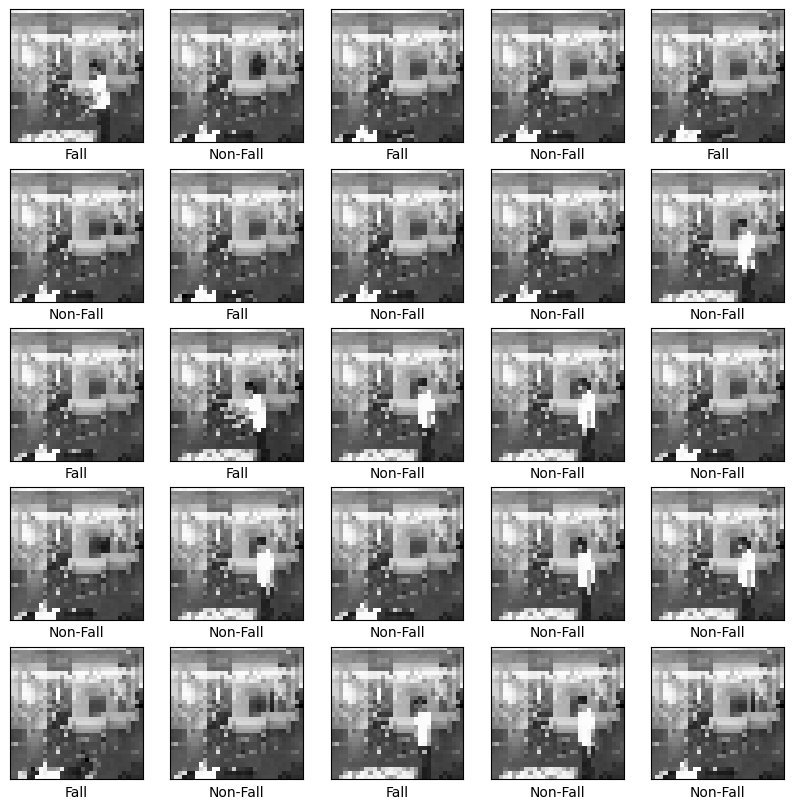

In [ ]:

class_name =['Fall',
             'Non-Fall']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_1[i], cmap = 'gray')
    plt.xlabel(class_name[label_1[i]])
plt.show()

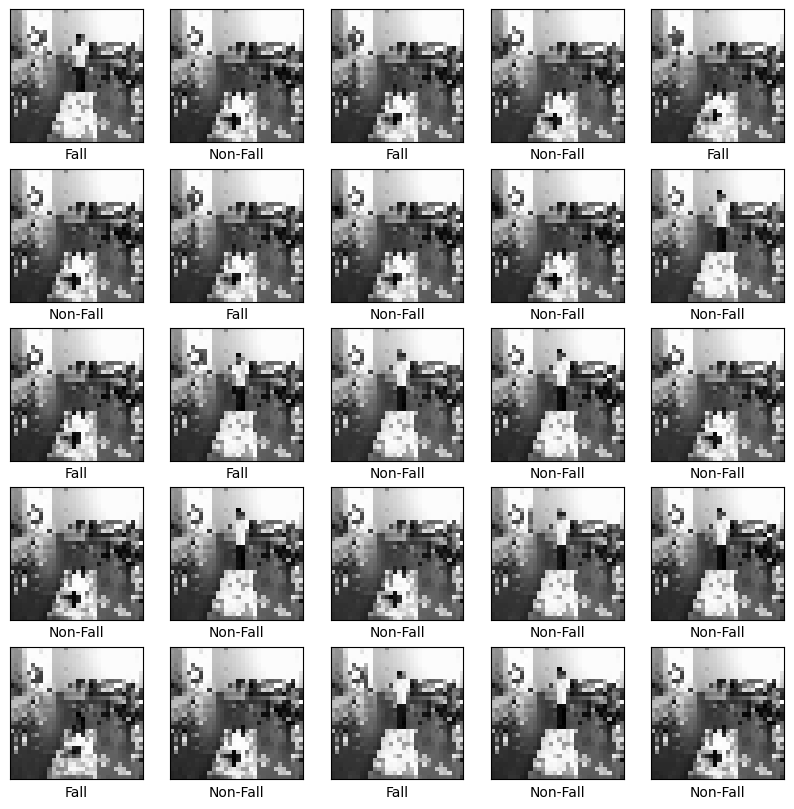

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_2[i], cmap = 'gray')
    plt.xlabel(class_name[label_2[i]])
plt.show()

In [ ]:

data = SUB.loc[name_1].values
print(img_1.shape)
print(img_2.shape)
print(data.shape)


print((label_2 == data[:,-1]).all())
print((label_1 == data[:,-1]).all())

(17932, 32, 32)
(17932, 32, 32)
(17932, 37)
True
True


In [ ]:

def set_seed():
    SEED = 0
    os.environ['PYTHONHASHSEED']=str(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    rn.seed(SEED)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

set_seed()
X_csv, y_csv = data[:,:-1] , data[:,-1]

y_csv = np.where(y_csv == 20 , 0, y_csv)
label_1 = np.where(label_1 == 20 , 0, label_1)
label_2 = np.where(label_2 == 20, 0, label_2)
X_train_csv,X_rem_csv,y_train_csv,y_rem_csv = train_test_split(X_csv, y_csv,
                                                                 train_size = 0.6,
                                                                 random_state = 42)

X_val_csv, X_test_csv, y_val_csv, y_test_csv = train_test_split(X_rem_csv, y_rem_csv,
                                                                  test_size = 0.5,
                                                                  random_state = 42)

print('X_train_csv shape : ',X_train_csv.shape)
print('X_test_csv shape : ',X_test_csv.shape)
print('X_val_csv shape : ',X_val_csv.shape)
print('y_train_csv shape : ',y_train_csv.shape)
print('y_test_csv shape : ',y_test_csv.shape)
print('y_val_csv shape : ',y_val_csv.shape)

Y_train_csv = to_categorical(y_train_csv, 2)
Y_test_csv = to_categorical(y_test_csv, 2)
Y_val_csv = to_categorical(y_val_csv, 2)

print('Y_train_csv shape : ',Y_train_csv.shape)
print('Y_test_csv shape : ',Y_test_csv.shape)
print('Y_val_csv shape : ',Y_val_csv.shape)



X_train_1,X_rem_1,y_train_1,y_rem_1 = train_test_split(img_1,label_1,
                                                         train_size = 0.6,
                                                         random_state = 42,
                                                         )

X_val_1,X_test_1,y_val_1,y_test_1 = train_test_split(X_rem_1,y_rem_1,
                                                         test_size = 0.5,
                                                         random_state = 42,
                                                         )
print('*'*20)
print('X_train_1 shape : ',X_train_1.shape)
print('X_test_1 shape : ',X_test_1.shape)
print('X_val_1 shape : ',X_val_1.shape)
print('y_train_1 shape : ',y_train_1.shape)
print('y_test_1 shape : ',y_test_1.shape)
print('y_val_1 shape : ',y_val_1.shape)


Y_train_1 = to_categorical(y_train_1, 2)
Y_test_1 = to_categorical(y_test_1, 2)
Y_val_1 = to_categorical(y_val_1, 2)

print('Y_train_1 shape : ',Y_train_1.shape)
print('Y_test_1 shape : ',Y_test_1.shape)
print('Y_val_1 shape : ',Y_val_1.shape)



X_train_2,X_rem_2,y_train_2,y_rem_2 = train_test_split(img_2,label_2,
                                                         train_size = 0.6,
                                                         random_state = 42,
                                                         )

X_val_2,X_test_2,y_val_2,y_test_2 = train_test_split(X_rem_2,y_rem_2,
                                                         test_size = 0.5,
                                                         random_state = 42,
                                                         )

print('*'*20)
print('X_train_2 shape : ',X_train_2.shape)
print('X_test_2 shape : ',X_test_2.shape)
print('X_val_2 shape : ',X_val_2.shape)
print('y_train_2 shape : ',y_train_2.shape)
print('y_test_2 shape : ',y_test_2.shape)
print('y_val_2 shape : ',y_val_2.shape)


Y_train_2 = to_categorical(y_train_2, 2)
Y_test_2 = to_categorical(y_test_2, 2)
Y_val_2 = to_categorical(y_val_2, 2)

print('Y_train_2 shape : ',Y_train_2.shape)
print('Y_test_2 shape : ',Y_test_2.shape)
print('Y_val_2 shape : ',Y_val_2.shape)


X_train_csv shape :  (10759, 36)
X_test_csv shape :  (3587, 36)
X_val_csv shape :  (3586, 36)
y_train_csv shape :  (10759,)
y_test_csv shape :  (3587,)
y_val_csv shape :  (3586,)
Y_train_csv shape :  (10759, 2)
Y_test_csv shape :  (3587, 2)
Y_val_csv shape :  (3586, 2)
********************
X_train_1 shape :  (10759, 32, 32)
X_test_1 shape :  (3587, 32, 32)
X_val_1 shape :  (3586, 32, 32)
y_train_1 shape :  (10759,)
y_test_1 shape :  (3587,)
y_val_1 shape :  (3586,)
Y_train_1 shape :  (10759, 2)
Y_test_1 shape :  (3587, 2)
Y_val_1 shape :  (3586, 2)
********************
X_train_2 shape :  (10759, 32, 32)
X_test_2 shape :  (3587, 32, 32)
X_val_2 shape :  (3586, 32, 32)
y_train_2 shape :  (10759,)
y_test_2 shape :  (3587,)
y_val_2 shape :  (3586,)
Y_train_2 shape :  (10759, 2)
Y_test_2 shape :  (3587, 2)
Y_val_2 shape :  (3586, 2)


In [ ]:
print((y_train_1 == y_train_csv).all())
print((y_train_2 == y_train_csv).all())

print((y_val_1 == y_val_csv).all())
print((y_val_2 == y_val_csv).all())

print((y_test_1 == y_test_csv).all())
print((y_test_2 == y_test_csv).all())

True
True
True
True
True
True


In [ ]:
shape1, shape2 = 32,32
X_train_1 = X_train_1.reshape(X_train_1.shape[0], shape1, shape2 ,1)
X_train_2 = X_train_2.reshape(X_train_2.shape[0], shape1, shape2 ,1)
X_val_1 = X_val_1.reshape(X_val_1.shape[0], shape1, shape2 , 1)
X_val_2 = X_val_2.reshape(X_val_2.shape[0], shape1, shape2 , 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], shape1, shape2 ,1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], shape1, shape2 ,1)

In [ ]:
X_train_1_scaled = X_train_1/255.0
X_train_2_scaled = X_train_2/255.0

X_val_1_scaled = X_val_1/255.0
X_val_2_scaled = X_val_2/255.0

X_test_1_scaled = X_test_1/255.0
X_test_2_scaled = X_test_2/255.0

In [ ]:
print(X_train_1_scaled.shape)
print(X_test_1_scaled.shape)
print(X_val_1_scaled.shape)

print(X_train_2_scaled.shape)
print(X_test_2_scaled.shape)
print(X_val_2_scaled.shape)

(10759, 32, 32, 1)
(3587, 32, 32, 1)
(3586, 32, 32, 1)
(10759, 32, 32, 1)
(3587, 32, 32, 1)
(3586, 32, 32, 1)


In [ ]:

def display_result(y_test , y_pred) :
    print('Accuracy score : ', accuracy_score(y_test , y_pred) )
    print('Precision score : ', precision_score(y_test , y_pred, average='weighted'))
    print('Recall score : ', recall_score(y_test , y_pred, average='weighted'))
    print('F1 score : ', f1_score(y_test , y_pred, average='weighted'))


def scaled_data(X_train, X_test, X_val):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_test_scaled , X_val_scaled


def convert_to_categorical (y_train, y_test, y_val) :
    print('--------------------------To Categorical ---------------------------')
    Y_train = to_categorical(y_train, 2)
    Y_test = to_categorical(y_test, 2)
    Y_val = to_categorical(y_val,2)

    print('Before    : ', y_train[0])
    print('After     : ',Y_train[0])
    return Y_train, Y_test, Y_val


X_train_csv_scaled, X_test_csv_scaled , X_val_csv_scaled = scaled_data(X_train_csv, X_test_csv, X_val_csv)
Y_train_csv , Y_test_csv , Y_val_csv = convert_to_categorical (y_train_csv, y_test_csv, y_val_csv)



--------------------------To Categorical ---------------------------
Before    :  1.0
After     :  [0. 1.]


# Sensor Data

## Multilayer Perceptron

In [ ]:

def csv_MLP(input_shapes):
    set_seed()
    model =  Sequential([
                    Dense(2000, activation = tf.nn.relu, input_shape = (input_shapes,)),
                    BatchNormalization(),
                    Dense(600, activation = tf.nn.relu),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(12, activation='softmax'),
                ])
    model.compile(
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 , name = 'Adam'),
                  loss='categorical_crossentropy' ,
                  metrics =[
                           keras.metrics.CategoricalAccuracy( name='categorical_accuracy'),
                           keras.metrics.Precision( name = 'precision' ),
                           keras.metrics.Recall( name = 'recall' ),
                           tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),
                          ] )
    return model
model_MLP = csv_MLP(X_train_csv_scaled.shape[1])
model_MLP.summary()

In [ ]:

f1_callback_MLP = ModelCheckpoint("Saved Model/Experiments/MLP_csv.hdf5",
                              monitor='val_f1_score',
                              verbose=1,
                              save_best_only=True,
                              mode='max')

history_MLP = model_MLP.fit(X_train_csv_scaled,Y_train_csv,
                                      epochs= 150,
                                      batch_size=  2**10,
                                      validation_data=(X_val_csv_scaled,Y_val_csv),
                                      callbacks = [f1_callback_MLP]
                                     )


In [ ]:
print("best model: ")
model_MLP.load_weights("Saved Model/Experiments/MLP_csv.hdf5")
print('Validation Set')
print(model_MLP.evaluate(X_val_csv_scaled, Y_val_csv))
print('Test Set')
print(model_MLP.evaluate(X_test_csv_scaled, Y_test_csv))


In [ ]:
print(history_MLP.history.keys())
plt.plot(history_MLP.history['categorical_accuracy'])
plt.plot(history_MLP.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_MLP.history['precision'])
plt.plot(history_MLP.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_MLP.history['recall'])
plt.plot(history_MLP.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_MLP.history['f1_score'])
plt.plot(history_MLP.history['f1_score'])
plt.title('model f1 score')
plt.ylabel('f1 score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## XGBBoost

In [ ]:
import xgboost
from xgboost import XGBClassifier


def csv_XGB() :
#     set_seed()
    model_XGB = XGBClassifier(objective="multi:softprob",
                              eta = 0.5,
                              random_state=42,
                              use_label_encoder=False,
                              n_estimators  = 60
                           )
    return model_XGB

model_XGB =  csv_XGB()

model_XGB.fit(
              X = X_train_csv_scaled,
              y =  y_train_csv ,
              eval_set = [(X_train_csv_scaled,y_train_csv) ,(X_val_csv_scaled,y_val_csv)],
              verbose= 1,
              early_stopping_rounds=5,
             )


In [ ]:
print('---------------------Test Set--------------------------')
y_pred_csv_XGB = model_XGB.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_XGB)

In [ ]:
filename = 'Saved Model/Experiments/XGB_model.sav'
joblib.dump(model_XGB, filename)
loaded_XGB_model = joblib.load(filename)

y_pred_csv_XGB = loaded_XGB_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_XGB)

## CATBOOST

In [ ]:
from catboost import CatBoostClassifier
def csv_CatBoost():
    model  = CatBoostClassifier(
                                n_estimators=500,
                                random_seed= 42,
                                learning_rate=0.25,
                                max_depth = 12,
                                )
    return model

model_catboost = csv_CatBoost()

model_catboost .fit(
    X_train_csv_scaled,
    y_train_csv,
    eval_set=(X_val_csv_scaled, y_val_csv),
    verbose= 1 ,
    early_stopping_rounds= 5
)



In [ ]:
print('---------------------Test Set--------------------------')
y_pred_csv_catboost = model_catboost.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_catboost)


In [ ]:
filename = 'Saved Model/Experiments/Catboost_model.sav'
joblib.dump(model_catboost, filename)
loaded_catboost_model = joblib.load(filename)

y_pred_csv_catboost = loaded_catboost_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_catboost)

# IMAGE 1

In [ ]:
print('X_train_1 shape : ',X_train_1.shape)
print('X_test_1 shape : ',X_test_1.shape)
print('X_val_1 shape : ',X_val_1.shape)
print('y_train_1 shape : ',y_train_1.shape)
print('y_test_1 shape : ',y_test_1.shape)
print('y_val_1 shape : ',y_val_1.shape)

print('Y_train_1 shape : ',Y_train_1.shape)
print('Y_test_1 shape : ',Y_test_1.shape)
print('Y_val_1 shape : ',Y_val_1.shape)

X_train_1 shape :  (10759, 32, 32, 1)
X_test_1 shape :  (3587, 32, 32, 1)
X_val_1 shape :  (3586, 32, 32, 1)
y_train_1 shape :  (10759,)
y_test_1 shape :  (3587,)
y_val_1 shape :  (3586,)
Y_train_1 shape :  (10759, 2)
Y_test_1 shape :  (3587, 2)
Y_val_1 shape :  (3586, 2)


In [ ]:



def img1_CNN(shape_1, shape_2):
    set_seed()

    input = Input(shape=  (shape_1, shape_2, 1) )
    conv = Conv2D(filters = 16,
                  kernel_size = (3,3) ,
                  activation = tf.nn.relu )(input)

    conv = BatchNormalization()(conv)
    conv = MaxPooling2D(pool_size=(2, 2))(conv)
    conv = Flatten()(conv)
    fc = Dense(units = 200,
               activation = tf.nn.relu)(conv)

    dropout = Dropout(rate = 0.2)(fc)
    softmax = Dense(units = 12 ,
                    activation = tf.nn.softmax)(dropout)
    model = Model(inputs = input, outputs = softmax)

    model.compile(
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 , name = 'Adam'),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,
                                           name = 'f1_score',
                                           average='weighted'),

              ])
    return  model

model_img1 = img1_CNN(32,32)
model_img1.summary()


In [ ]:


filepath = 'Saved Model/Experiments/CNN_img1.hdf5'
f1_callback1 = ModelCheckpoint(filepath,
                              monitor='val_f1_score',
                              verbose=1,
                              save_best_only=True,
                              mode='max')

history_img1 =model_img1.fit(
                                X_train_1_scaled,Y_train_1,
                                epochs=30,
                                batch_size=  2**10,
                                validation_data=(X_val_1_scaled,Y_val_1),
                                callbacks = [f1_callback1]
                )



In [ ]:
print(history_img1.history.keys())
plt.plot(history_img1.history['categorical_accuracy'])
plt.plot(history_img1.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_img1.history['precision'])
plt.plot(history_img1.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



plt.plot(history_img1.history['recall'])
plt.plot(history_img1.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
print("best model: ")
model_img1.load_weights('Saved Model/Experiments/CNN_img1.hdf5')
print(model_img1.evaluate(X_val_1_scaled, Y_val_1))
print(model_img1.evaluate(X_test_1_scaled, Y_test_1))

# IMAGE 2

In [ ]:
print('X_train_2 shape : ',X_train_2.shape)
print('X_test_2 shape : ',X_test_2.shape)
print('X_val_2 shape : ',X_val_2.shape)
print('y_train_2 shape : ',y_train_2.shape)
print('y_test_2 shape : ',y_test_2.shape)
print('y_val_2 shape : ',y_val_2.shape)

print('Y_train_2 shape : ',Y_train_2.shape)
print('Y_test_2 shape : ',Y_test_2.shape)
print('Y_val_2 shape : ',Y_val_2.shape)

X_train_2 shape :  (10759, 32, 32, 1)
X_test_2 shape :  (3587, 32, 32, 1)
X_val_2 shape :  (3586, 32, 32, 1)
y_train_2 shape :  (10759,)
y_test_2 shape :  (3587,)
y_val_2 shape :  (3586,)
Y_train_2 shape :  (10759, 2)
Y_test_2 shape :  (3587, 2)
Y_val_2 shape :  (3586, 2)


In [ ]:
def img2_CNN(shape_1, shape_2):
    set_seed()

    input = Input(shape=  (shape_1, shape_2, 1) )
    conv = Conv2D(filters = 18 ,
                  kernel_size = (3,3) ,
                  activation = tf.nn.relu )(input)
    conv = BatchNormalization()(conv)
    conv = MaxPooling2D(pool_size=(2, 2))(conv)
    conv = Flatten()(conv)
    fc = Dense(units = 100,
               activation = tf.nn.relu)(conv)
    dropout = Dropout(rate = 0.2)(fc)
    softmax = Dense(units = 12 ,
                    activation = tf.nn.softmax)(dropout)
    model = Model(inputs = input, outputs = softmax)

    model.compile(
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001 , name = 'Adam'),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),

              ])
    return  model

model_img2 = img2_CNN(32,32)
model_img2.summary()

In [ ]:


f1_callback2 = ModelCheckpoint("Saved Model/Experiments/CNN_img2.hdf5",
                              monitor='val_f1_score',
                              verbose=1,
                              save_best_only=True,
                              mode='max')

history_img2 =model_img2.fit(
                                X_train_2_scaled,Y_train_2,
                                epochs=30,
                                batch_size=  2**10,
                                validation_data=(X_val_2_scaled,Y_val_2),
                                callbacks = [f1_callback2]
                )


In [ ]:
print(history_img2.history.keys())
plt.plot(history_img2.history['categorical_accuracy'])
plt.plot(history_img2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img2.history['precision'])
plt.plot(history_img2.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img2.history['recall'])
plt.plot(history_img2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_img2.history['f1_score'])
plt.plot(history_img2.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [ ]:
print("best model: ")
model_img2.load_weights("Saved Model/Experiments/CNN_img2.hdf5")
print(model_img2.evaluate(X_val_2_scaled, Y_val_2))
print(model_img2.evaluate(X_test_2_scaled, Y_test_2))

# IMG1 + IMG2

In [ ]:
def concatenate_IMG(shape1, shape2) :
    set_seed()
    #------------------------------------------
    input1 = Input(shape = (shape1, shape2, 1))
    conv1 = Conv2D(filters = 16 ,
                   kernel_size = (3, 3) ,
                   activation = tf.nn.relu )(input1)
    conv1 = MaxPooling2D(pool_size = (2,2))(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Flatten()(conv1)
    #------------------------------------------
    input2 = Input( shape = (shape1, shape2, 1))
    conv2 = Conv2D(filters = 16 ,
                   kernel_size = (3, 3) ,
                   activation= tf.nn.relu )(input2)
    conv2 = MaxPooling2D(2, 2)(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Flatten()(conv2)
    #------------------------------------------
    concat = Concatenate(axis=1)([conv1, conv2])
    concat = Dense(units = 400 ,
                   activation = tf.nn.relu)(concat)
    concat = Dense(units = 200 ,
                   activation = tf.nn.relu)(concat)
    dropout = Dropout(0.2)(concat)
    softmax = Dense(2, activation = tf.nn.softmax )(dropout)
    model = Model(inputs=[input1, input2], outputs=softmax)

    model.compile(
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
                 metrics = [
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                            keras.metrics.Precision(name='precision'),
                            keras.metrics.Recall(name='recall'),
                            tfa.metrics.F1Score( num_classes=2,
                                                name = 'f1_score',
                                                average='weighted')]  )

    return model


In [ ]:
shape1 ,shape2 = 32, 32
model_img12 = concatenate_IMG(shape1, shape2)

In [ ]:
model_img12.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 30, 30, 16)   160         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 30, 30, 16)   160         ['input_2[0][0]']                
                                                                                              

In [ ]:
print(X_train_1_scaled.shape)
print(X_train_2_scaled.shape)
print(Y_val_1.shape)
print(Y_train_1.shape)

(10759, 32, 32, 1)
(10759, 32, 32, 1)
(3586, 2)
(10759, 2)


In [ ]:

f1_callback_img12 = ModelCheckpoint("Saved Model/Experiments/model_img12.hdf5",
                              monitor='val_f1_score',
                              verbose=2,
                              save_best_only=True,
                              mode='max')
history_img12 = model_img12.fit(x = [X_train_1_scaled, X_train_2_scaled],
                      y=  Y_train_1,
                      epochs=30,
                      batch_size = 2**10 ,
                      validation_data = ([X_val_1_scaled, X_val_2_scaled] , Y_val_1),
                      callbacks = [f1_callback_img12]
                     )

Epoch 1/30
11/11 [==============================] - ETA: 0s - loss: 0.5343 - categorical_accuracy: 0.8637 - precision: 0.8637 - recall: 0.8637 - f1_score: 0.8923
Epoch 1: val_f1_score improved from -inf to 0.08553, saving model to Saved Model/Experiments/model_img12.hdf5
11/11 [==============================] - 12s 132ms/step - loss: 0.5343 - categorical_accuracy: 0.8637 - precision: 0.8637 - recall: 0.8637 - f1_score: 0.8923 - val_loss: 0.8390 - val_categorical_accuracy: 0.0837 - val_precision: 0.0837 - val_recall: 0.0837 - val_f1_score: 0.0855
Epoch 2/30
10/11 [==========================>...] - ETA: 0s - loss: 0.1635 - categorical_accuracy: 0.9493 - precision: 0.9493 - recall: 0.9493 - f1_score: 0.9489
Epoch 2: val_f1_score improved from 0.08553 to 0.77933, saving model to Saved Model/Experiments/model_img12.hdf5
11/11 [==============================] - 1s 50ms/step - loss: 0.1601 - categorical_accuracy: 0.9503 - precision: 0.9503 - recall: 0.9503 - f1_score: 0.9496 - val_loss: 0.641

In [ ]:
print("best model: ")
model_img12.load_weights("Saved Model/Experiments/model_img12.hdf5")
print(model_img12.evaluate([X_val_1_scaled, X_val_2_scaled] , Y_val_1))
print(model_img12.evaluate([X_test_1_scaled, X_test_2_scaled] , Y_test_1))

best model: 
113/113 [==============================] - 1s 5ms/step - loss: 0.0510 - categorical_accuracy: 0.9939 - precision: 0.9939 - recall: 0.9939 - f1_score: 0.9937
[0.051008958369493484, 0.9938650131225586, 0.9938650131225586, 0.9938650131225586, 0.9936943054199219]
113/113 [==============================] - 1s 4ms/step - loss: 0.0525 - categorical_accuracy: 0.9922 - precision: 0.9922 - recall: 0.9922 - f1_score: 0.9919
[0.052456922829151154, 0.9921940565109253, 0.9921940565109253, 0.9921940565109253, 0.9919144511222839]


In [ ]:
from tensorflow.keras.models import load_model

# load the saved model
saved_model = load_model("Saved Model/Experiments/model_img12.hdf5")

# perform inference on new data
predictions = saved_model.predict([X_test_1_scaled, X_test_2_scaled])

predicted_labels = np.argmax(predictions, axis=1)


113/113 [==============================] - 0s 2ms/step


# CONCATENATE

In [ ]:
def model_csv_img (num_csv_features , img_shape1, img_shape2):
    set_seed()

    inputs1 = Input(shape= ( num_csv_features ,1 ) )
    conv1 = Conv1D(filters=10, kernel_size=3, activation='relu')(inputs1)
    pool1 = MaxPooling1D(pool_size=2)(conv1)
    batch1 = BatchNormalization()(pool1)
    flat1 = Flatten()(batch1)
    #--------------------------
    inputs2 = Input(shape=  (img_shape1, img_shape2, 1) )
    conv2 = Conv2D(filters = 16 ,
                   kernel_size = (3, 3),
                   activation=  tf.nn.relu )(inputs2)
    pool2 = MaxPooling2D(pool_size = (2,2))(conv2)
    batch2 = BatchNormalization()(pool2)
    flat2 = Flatten()(batch2)
    #--------------------------
    inputs3 = Input(shape=  (img_shape1, img_shape2, 1) )
    conv3 = Conv2D(16 ,(3, 3), activation='relu')(inputs3)
    pool3 = MaxPooling2D(pool_size = (2,2))(conv3)
    batch3 = BatchNormalization()(pool3)
    flat3 = Flatten()(batch3)
    #--------------------------
    merged = Concatenate(axis=1)([flat1, flat2,flat3])
    dense1 = Dense(units = 600, activation='relu')(merged)
    dense2 = Dense(units = 1200, activation='relu')(dense1)
    dropout = Dropout(0.2)(dense2)
    outputs = Dense(2, activation='softmax')(dropout)
    model  = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)

    model.compile(
                 optimizer = tf.keras.optimizers.Adam(0.001),
                 loss = keras.losses.CategoricalCrossentropy(name='categorical_crossentropy'),
                 metrics = [
                            keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
                            keras.metrics.Precision(name='precision'),
                            keras.metrics.Recall(name='recall'),
                            tfa.metrics.F1Score( num_classes=2,
                                                name = 'f1_score',
                                                average='weighted')
                           ]
    )

    return model

In [ ]:
model_concatenate = model_csv_img (X_train_csv_scaled.shape[1] ,
                                   32,
                                   32)

In [ ]:
model_concatenate.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 36, 1)]      0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 34, 10)       40          ['input_3[0][0]']                
                                                                                            

In [ ]:


f1_callback_concat = ModelCheckpoint("Saved Model/Experiments/model_concatenate.hdf5",
                              monitor='val_f1_score',
                              verbose=1,
                              save_best_only=True,
                              mode='max')
history_concatenate = model_concatenate.fit(x = [X_train_csv_scaled,X_train_1_scaled, X_train_2_scaled],
                      y=  Y_train_csv,
                      epochs= 30,
                      batch_size = 2**10 ,
                      validation_data = ([X_val_csv_scaled,X_val_1_scaled, X_val_2_scaled] , Y_val_csv),
                      callbacks = [f1_callback_concat]
                     )



Epoch 1/30
11/11 [==============================] - ETA: 0s - loss: 1.2028 - categorical_accuracy: 0.8941 - precision: 0.8941 - recall: 0.8941 - f1_score: 0.9102
Epoch 1: val_f1_score improved from -inf to 0.93935, saving model to Saved Model/Experiments/model_concatenate.hdf5
11/11 [==============================] - 7s 169ms/step - loss: 1.2028 - categorical_accuracy: 0.8941 - precision: 0.8941 - recall: 0.8941 - f1_score: 0.9102 - val_loss: 0.2249 - val_categorical_accuracy: 0.9593 - val_precision: 0.9593 - val_recall: 0.9593 - val_f1_score: 0.9394
Epoch 2/30
10/11 [==========================>...] - ETA: 0s - loss: 0.4623 - categorical_accuracy: 0.9529 - precision: 0.9529 - recall: 0.9529 - f1_score: 0.9470
Epoch 2: val_f1_score did not improve from 0.93935
11/11 [==============================] - 1s 48ms/step - loss: 0.4479 - categorical_accuracy: 0.9510 - precision: 0.9510 - recall: 0.9510 - f1_score: 0.9470 - val_loss: 0.6183 - val_categorical_accuracy: 0.4590 - val_precision: 0.4

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


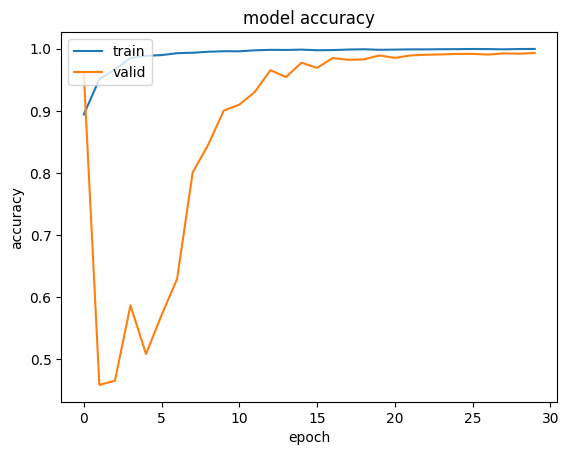

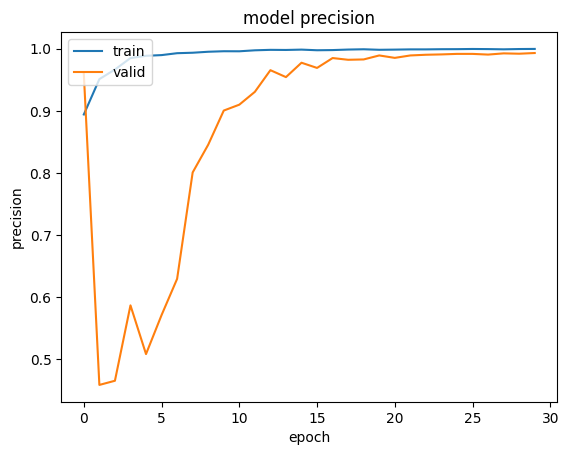

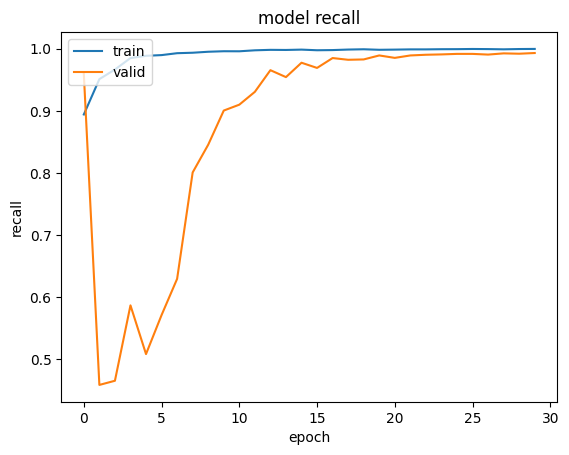

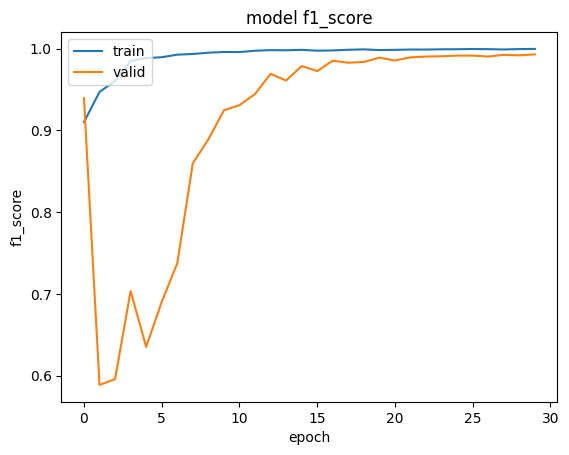

In [ ]:
print(history_concatenate.history.keys())
plt.plot(history_concatenate.history['categorical_accuracy'])
plt.plot(history_concatenate.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_concatenate.history['precision'])
plt.plot(history_concatenate.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_concatenate.history['recall'])
plt.plot(history_concatenate.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_concatenate.history['f1_score'])
plt.plot(history_concatenate.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


In [ ]:
print("best model: ")
model_concatenate.load_weights("Saved Model/Experiments/model_concatenate.hdf5")
print(model_concatenate.evaluate([X_val_csv_scaled, X_val_1_scaled, X_val_2_scaled] , Y_val_1))
print(model_concatenate.evaluate([X_test_csv_scaled, X_test_1_scaled, X_test_2_scaled] , Y_test_1))


best model: 
113/113 [==============================] - 1s 6ms/step - loss: 0.0190 - categorical_accuracy: 0.9939 - precision: 0.9939 - recall: 0.9939 - f1_score: 0.9938
[0.01895492896437645, 0.9938650131225586, 0.9938650131225586, 0.9938650131225586, 0.9938033223152161]
113/113 [==============================] - 1s 4ms/step - loss: 0.0222 - categorical_accuracy: 0.9908 - precision: 0.9908 - recall: 0.9908 - f1_score: 0.9907
[0.022179128602147102, 0.9908000826835632, 0.9908000826835632, 0.9908000826835632, 0.9906712770462036]


# Comparing with different model

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def csv_RandomForest():
    model = RandomForestClassifier(n_estimators = 10,
                                   min_samples_split = 2,
                                   min_samples_leaf = 1,
                                   bootstrap = True,
                                   random_state = 0
                                    )
    return model


In [ ]:
model_RF = csv_RandomForest()
model_RF.fit(X_train_csv_scaled, y_train_csv)
y_pred_RandomForest = model_RF.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_RandomForest)

Accuracy score :  0.9746430854464095
Precision score :  0.97299353092025
Recall score :  0.9746430854464095
F1 score :  0.9728036654461721


In [ ]:
filename = 'Saved Model/Paper/RandomForest_model.sav'
joblib.dump(model_RF, filename)
loaded_RF_model = joblib.load(filename)

y_pred_csv_RandomForest = loaded_RF_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_RandomForest)

Accuracy score :  0.9746430854464095
Precision score :  0.97299353092025
Recall score :  0.9746430854464095
F1 score :  0.9728036654461721


## SVM

In [ ]:
from sklearn import svm
def csv_SVM():
    model = svm.SVC(C = 1,
                kernel = 'rbf',
                gamma  = 'auto',
                shrinking  = True,
                tol = 0.001,
                random_state = 0
                )
    return model




In [ ]:
model_SVM = csv_SVM()
model_SVM.fit(X_train_csv_scaled, y_train_csv)
y_pred_SVM = model_SVM.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_SVM)

Accuracy score :  0.9696840555566317
Precision score :  0.9682218625909775
Recall score :  0.9696840555566317
F1 score :  0.9661331258667356


In [ ]:
filename = 'Saved Model/Paper/SVM_model.sav'
joblib.dump(model_SVM, filename)
loaded_SVM_model = joblib.load(filename)

y_pred_csv_SVM = loaded_SVM_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_SVM)

Accuracy score :  0.9696840555566317
Precision score :  0.9682218625909775
Recall score :  0.9696840555566317
F1 score :  0.9661331258667356


## kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def csv_kNN():
    model = KNeighborsClassifier(n_neighbors=5,
                                 leaf_size = 30,
                                 metric = 'euclidean')
    return model



In [ ]:
model_kNN = csv_kNN()
model_kNN.fit(X_train_csv_scaled, y_train_csv)
y_pred_kNN = model_kNN.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_kNN)

Accuracy score :  0.9724735098696318
Precision score :  0.9707220537176988
Recall score :  0.9724735098696318
F1 score :  0.9705624147721252


In [ ]:
filename = 'Saved Model/Paper/KNN_model.sav'
joblib.dump(model_kNN, filename)
loaded_KNN_model = joblib.load(filename)

y_pred_csv_KNN = loaded_KNN_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_KNN)

Accuracy score :  0.9724735098696318
Precision score :  0.9707220537176988
Recall score :  0.9724735098696318
F1 score :  0.9705624147721252


## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

def csv_MLP():
    model = MLPClassifier(hidden_layer_sizes=(100,),
                          activation='relu',
                          solver='sgd',
                          alpha=0.0001,
                          batch_size='auto',
                          learning_rate_init=0.001,
                          shuffle=True,
                          random_state=0,
                          tol=0.0001,
                          verbose=True,
                          beta_1 = 0.9,
                          beta_2 = 0.999,
                          max_iter = 10 )
    return model




In [ ]:
model_MLP = csv_MLP()
model_MLP.fit(X_train_csv_scaled, y_train_csv)
y_pred_MLP = model_MLP.predict(X_test_csv_scaled)
display_result(y_test_csv,y_pred_MLP)


Iteration 1, loss = 1.44348865
Iteration 2, loss = 0.91531298
Iteration 3, loss = 0.73099396
Iteration 4, loss = 0.62725433
Iteration 5, loss = 0.55896672
Iteration 6, loss = 0.50918701
Iteration 7, loss = 0.47050653
Iteration 8, loss = 0.43908364
Iteration 9, loss = 0.41294291
Iteration 10, loss = 0.39081072


/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy score :  0.9021753869399298
Precision score :  0.8836096881084812
Recall score :  0.9021753869399298
F1 score :  0.8843256709741995


/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
filename = 'Saved Model/Paper/MLP_model.sav'
joblib.dump(model_MLP, filename)
loaded_MLP_model = joblib.load(filename)

y_pred_csv_MLP = loaded_MLP_model.predict(X_test_csv_scaled)
display_result(y_test_csv, y_pred_csv_MLP)

Accuracy score :  0.9021753869399298
Precision score :  0.8836096881084812
Recall score :  0.9021753869399298
F1 score :  0.8843256709741995


/home/tf/.conda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def model_paper(shape1, shape2):
    set_seed()
    model =   Sequential([
                        Conv2D(8 ,(3, 3),
                               activation = tf.nn.relu,
                               input_shape=( shape1 , shape2 ,1)),
                        MaxPooling2D(2, 2),
                        Conv2D(16 ,(3, 3),
                               activation = tf.nn.relu),
                        MaxPooling2D(2, 2),
                        Conv2D(32 ,(3, 3),
                               activation = tf.nn.relu),
                        MaxPooling2D(2, 2),
                        Flatten(),
                        Dense(12, activation= tf.nn.softmax,
                                              kernel_regularizer=tf.keras.regularizers.l1(0.004),
                                              activity_regularizer=tf.keras.regularizers.l2(0.004)) ])


    model.compile(
              optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, name='SGD'),
              loss = 'categorical_crossentropy' ,
              metrics =[
                       keras.metrics.CategoricalAccuracy(name='categorical_accuracy') ,
                       keras.metrics.Precision(name='precision'),
                       keras.metrics.Recall(name='recall'),
                       tfa.metrics.F1Score( num_classes=12,   name = 'f1_score', average='weighted'),

              ])
    return  model

model_img_paper1 = model_paper(32,32)
model_img_paper1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [ ]:
X_train_1.shape

(154867, 32, 32, 1)

In [ ]:
f1_paper_callback1 = ModelCheckpoint("Saved Model/Paper/UP_1_32.hdf5",
                              monitor='val_f1_score',
                              verbose=1,
                              save_best_only=True,
                              mode='max')

history_img_paper1 = model_img_paper1.fit(
                                X_train_1_scaled,Y_train_1,
                                epochs=30,
                                batch_size=  100,
                                validation_data=(X_val_1_scaled,Y_val_1),
                                callbacks = [f1_paper_callback1 ]
                )


Epoch 1/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.6792 - categorical_accuracy: 0.2635 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1265 - val_loss: 2.3581 - val_categorical_accuracy: 0.2777 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1207

Epoch 00001: val_f1_score improved from -inf to 0.12075, saving model to Saved Model/Paper/UP_1_32.hdf5
Epoch 2/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.3308 - categorical_accuracy: 0.2785 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1214 - val_loss: 2.3139 - val_categorical_accuracy: 0.2777 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1207

Epoch 00002: val_f1_score did not improve from 0.12075
Epoch 3/30
1549/1549 [==============================] - 38s 25ms/step - loss: 2.2897 - categorical_accuracy: 0.2785 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1214 - val_loss: 2.2745 - val_categorical_ac

In [ ]:
print("best model: ")
model_img_paper1.load_weights("Saved Model/Paper/UP_1_32.hdf5")
print(model_img_paper1.evaluate(X_val_1_scaled, Y_val_1))
print(model_img_paper1.evaluate(X_test_1_scaled, Y_test_1))

best model: 
1614/1614 [==============================] - 7s 4ms/step - loss: 0.8270 - categorical_accuracy: 0.7923 - precision: 0.8522 - recall: 0.7092 - f1_score: 0.7704
[0.8270156979560852, 0.7922631502151489, 0.8521648049354553, 0.7091606259346008, 0.7704067230224609]
1614/1614 [==============================] - 6s 4ms/step - loss: 0.8299 - categorical_accuracy: 0.7892 - precision: 0.8481 - recall: 0.7098 - f1_score: 0.7669
[0.8298739194869995, 0.7892025113105774, 0.8480766415596008, 0.7097998857498169, 0.7669154405593872]


dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


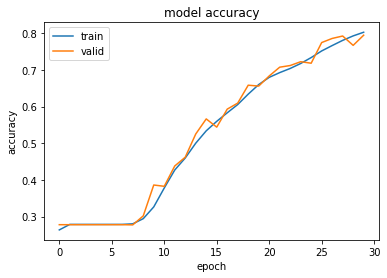

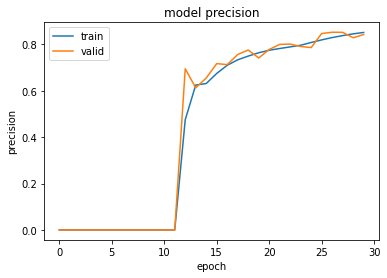

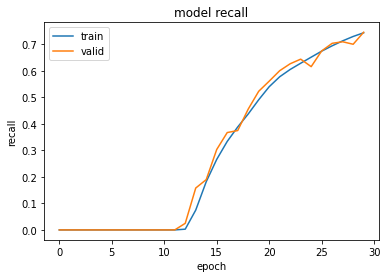

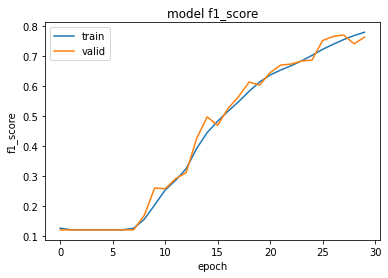

In [ ]:
print(history_img_paper1.history.keys())
plt.plot(history_img_paper1.history['categorical_accuracy'])
plt.plot(history_img_paper1.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper1.history['precision'])
plt.plot(history_img_paper1.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper1.history['recall'])
plt.plot(history_img_paper1.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_img_paper1.history['f1_score'])
plt.plot(history_img_paper1.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [ ]:
model_img_paper2 = model_paper(32,32)
model_img_paper2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 32)          4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [ ]:
f1_paper_callback2 = ModelCheckpoint("Saved Model/Paper/UP_2_32.hdf5",
                              monitor='val_f1_score',
                              verbose=1,
                              save_best_only=True,
                              mode='max')

history_img_paper2 = model_img_paper2.fit(
                                X_train_2_scaled,Y_train_2,
                                epochs=30,
                                batch_size=  100,
                                validation_data=(X_val_2_scaled,Y_val_2),
                                callbacks = [f1_paper_callback2 ]
                )


Epoch 1/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.6647 - categorical_accuracy: 0.2663 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.1265 - val_loss: 2.3155 - val_categorical_accuracy: 0.2777 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.1207

Epoch 00001: val_f1_score improved from -inf to 0.12075, saving model to Saved Model/Paper/UP_2_32.hdf5
Epoch 2/30
1549/1549 [==============================] - 39s 25ms/step - loss: 2.2366 - categorical_accuracy: 0.3451 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.2350 - val_loss: 2.1299 - val_categorical_accuracy: 0.5333 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: 0.4336

Epoch 00002: val_f1_score improved from 0.12075 to 0.43361, saving model to Saved Model/Paper/UP_2_32.hdf5
Epoch 3/30
1549/1549 [==============================] - 39s 25ms/step - loss: 1.8845 - categorical_accuracy: 0.6418 - precision: 0.8738 - recall: 0.1497 - f1_score: 0.

In [ ]:
print("best model: ")
model_img_paper2.load_weights("Saved Model/Paper/UP_2_32.hdf5")
print(model_img_paper2.evaluate(X_val_2_scaled, Y_val_2))
print(model_img_paper2.evaluate(X_test_2_scaled, Y_test_2))

best model: 
1614/1614 [==============================] - 7s 4ms/step - loss: 0.5303 - categorical_accuracy: 0.8822 - precision: 0.9028 - recall: 0.8609 - f1_score: 0.8603
[0.530326783657074, 0.8821843266487122, 0.9027644991874695, 0.8609340786933899, 0.8602725267410278]
1614/1614 [==============================] - 7s 4ms/step - loss: 0.5296 - categorical_accuracy: 0.8825 - precision: 0.9033 - recall: 0.8613 - f1_score: 0.8607
[0.5296090841293335, 0.8824554681777954, 0.9032624959945679, 0.8613215088844299, 0.8606771230697632]


dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


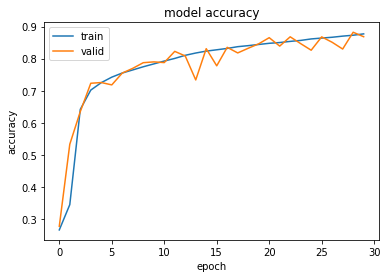

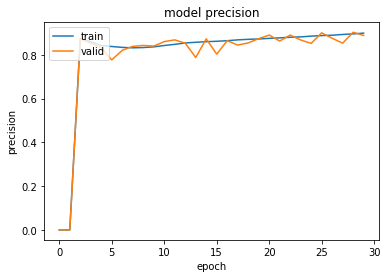

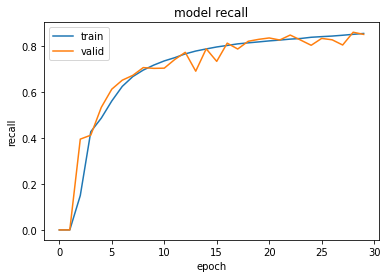

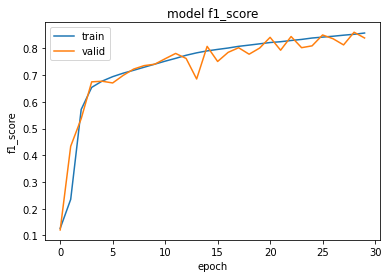

In [ ]:
print(history_img_paper2.history.keys())
plt.plot(history_img_paper2.history['categorical_accuracy'])
plt.plot(history_img_paper2.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper2.history['precision'])
plt.plot(history_img_paper2.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history_img_paper2.history['recall'])
plt.plot(history_img_paper2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()


plt.plot(history_img_paper2.history['f1_score'])
plt.plot(history_img_paper2.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()